### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Additional dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# look at data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# check the shape
application_df.shape

(34299, 12)

In [6]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(["EIN"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


C:\Users\oscy7\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# check shape
application_df.shape

(34299, 11)

In [8]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts fo
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

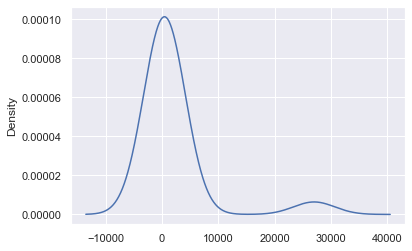

In [10]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

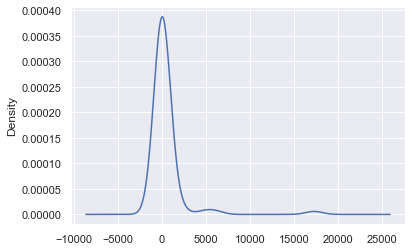

In [13]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [14]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [16]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE              9
AFFILIATION                   6
CLASSIFICATION                6
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [17]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [18]:
# look at name value counts
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

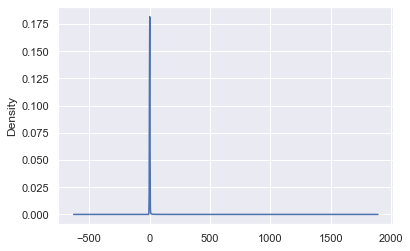

In [19]:
name_counts.plot.density()

In [20]:
name_counts[name_counts <= 1]

ARTS SCIENCE AND TECHNOLOGY EDUCATIONAL CORPORATION OF TEHACHA          1
UPTE-CWA RETIRED MEMBERS CHAPTER 9119                                   1
WORLD PRESIDENTS ORGANIZATION INC                                       1
HOMELESS ANIMAL RESCUE TEAM                                             1
DREAM WEAVER CHARITABLE TR                                              1
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 18776, dtype: int64

In [21]:
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [22]:
name_counts[(name_counts <= 100) & (name_counts > 5)]

AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
OLD OAK CLIFF CONSERVATION LEAGUE INC                       6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                      6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC                   6
PROFESSIONAL LOADMASTER ASSOCIATION                         6
CBMC INC                                                    6
Name: NAME, Length: 324, dtype: int64

In [23]:
len(name_counts[name_counts >100])

30

In [24]:
# use Bucket technique
replace_application = list(name_counts[name_counts <=1].index)

#replace in df
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"No_repeat")
    
#check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [25]:
# use Bucket technique again
replace_application = list(name_counts[name_counts <=5].index)

#replace in df
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Infrequent")
    
#check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                       18776
Infrequent                                       1267
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 356, dtype: int64

In [26]:
# use Bucket technique
replace_application = list(name_counts[name_counts <=100].index)

#replace in df
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Frequent")
    
#check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
Frequent                                                               5944
Infrequent                                                             1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [27]:
# use Bucket technique
replace_application = list(name_counts[name_counts > 100].index)

#replace in df
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Habitual")
    
#check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat     18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

In [28]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [29]:
[application_df.dtypes == "object"]

[NAME                       True
 APPLICATION_TYPE           True
 AFFILIATION                True
 CLASSIFICATION             True
 USE_CASE                   True
 ORGANIZATION               True
 STATUS                    False
 INCOME_AMT                 True
 SPECIAL_CONSIDERATIONS     True
 ASK_AMT                   False
 IS_SUCCESSFUL             False
 dtype: bool]

In [30]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [31]:
application_df.dtypes[application_df.dtypes == "object"].index.tolist()

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [32]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [33]:
#testing
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,Frequent,T10,Independent,C1000,ProductDev,Association,0,N
1,No_repeat,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,No_repeat,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,No_repeat,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,No_repeat,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...,...
34294,No_repeat,T4,Independent,C1000,ProductDev,Association,0,N
34295,Habitual,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,Infrequent,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,No_repeat,T5,Independent,C3000,ProductDev,Association,0,N


In [34]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\oscy7\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\oscy7\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
application_df.shape

(34299, 48)

In [37]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   NAME_Frequent                 34299 non-null  float64
 4   NAME_Habitual                 34299 non-null  float64
 5   NAME_Infrequent               34299 non-null  float64
 6   NAME_No_repeat                34299 non-null  float64
 7   APPLICATION_TYPE_Other        34299 non-null  float64
 8   APPLICATION_TYPE_T10          34299 non-null  float64
 9   APPLICATION_TYPE_T19          34299 non-null  float64
 10  APPLICATION_TYPE_T3           34299 non-null  float64
 11  APPLICATION_TYPE_T4           34299 non-null  float64
 12  APPLICATION_TYPE_T5           34299 non-null  float64
 13  A

In [38]:
application_df.nunique()

STATUS                             2
ASK_AMT                         8747
IS_SUCCESSFUL                      2
NAME_Frequent                      2
NAME_Habitual                      2
NAME_Infrequent                    2
NAME_No_repeat                     2
APPLICATION_TYPE_Other             2
APPLICATION_TYPE_T10               2
APPLICATION_TYPE_T19               2
APPLICATION_TYPE_T3                2
APPLICATION_TYPE_T4                2
APPLICATION_TYPE_T5                2
APPLICATION_TYPE_T6                2
APPLICATION_TYPE_T7                2
APPLICATION_TYPE_T8                2
AFFILIATION_CompanySponsored       2
AFFILIATION_Family/Parent          2
AFFILIATION_Independent            2
AFFILIATION_National               2
AFFILIATION_Other                  2
AFFILIATION_Regional               2
CLASSIFICATION_C1000               2
CLASSIFICATION_C1200               2
CLASSIFICATION_C2000               2
CLASSIFICATION_C2100               2
CLASSIFICATION_C3000               2
C

In [39]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values


y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_tests = train_test_split(X, y, random_state=78)

C:\Users\oscy7\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# test
len(X_train[0])

47

### Deliverable 2: Compile, Train and Evaluate the Model

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 141)               6768      
                                                                 
 dense_1 (Dense)             (None, 94)                13348     
                                                                 
 dense_2 (Dense)             (None, 47)                4465      
                                                                 
 dense_3 (Dense)             (None, 20)                960       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,562
Trainable params: 25,562
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "Checkpoints/weights.{epoch:02d}.hdf5"

In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Create a callback that saves the model's weights every epoch (set to 5)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch")

In [46]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
797/804 [============================>.] - ETA: 0s - loss: 0.5845 - accuracy: 0.7134
Epoch 1: saving model to Checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5844 - accuracy: 0.7132
Epoch 2/100
781/804 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7375
Epoch 2: saving model to Checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.7378
Epoch 3/100
784/804 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7453
Epoch 3: saving model to Checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5269 - accuracy: 0.7445
Epoch 4/100
804/804 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.7490
Epoch 4: saving model to Checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5240 - accuracy: 0.7490
Epoch 5/100
804/804 [=======================

<AxesSubplot:>

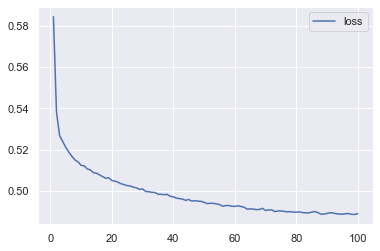

In [47]:
# Create a DataFrame containing training History
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

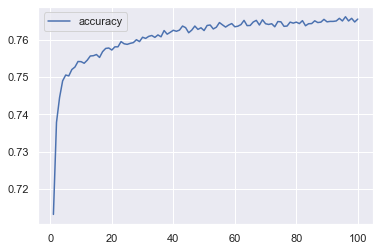

In [48]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_tests,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5411 - accuracy: 0.7430 - 431ms/epoch - 2ms/step
Loss: 0.5411022305488586, Accuracy: 0.7429737448692322


In [50]:
# Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity.h5")